In [1]:
import matplotlib.pyplot as plot
import numpy as np

mflu = 33.6954 # g
vflu = 25 # mL ~ cm³
rhoflu = mflu / vflu # g/cm³
T0 = 25 # celcius


Equação linearizada
$ ln( \mu (T) ) = ln(\mu_0) + \frac{E}{RT} $

<function matplotlib.pyplot.show(close=None, block=None)>

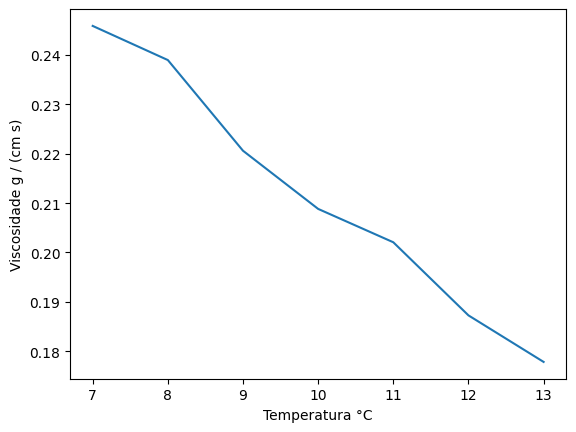

In [15]:
# visc de esfera
k = 0.00122 # cm²/s²
rhosol = 8.116 # g/cm³ 
T = [7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0] # celcius
t = [(29.85 + 30.30 + 29.40)/3.0, (28.94 + 29.18 + 28.90)/3.0, (26.73 + 26.79 + 26.80)/3.0, (26 + 24.99 + 25.03)/3.0, (24.90 + 24.33 + 24.32)/3.0, (22.62 + 22.85 + 22.68)/3.0, (21.47 + 21.67 + 21.57)/3.0] # s
mu = [*range(len(t))]
rhofluid = [*range(len(T))]

for i in range(len(T)):
    rhofluid[i] = rhoflu * (1 - (beta * ( T[i] - T0 )))
    mu[i] = k * (rhosol - rhofluid[i]) * t[i]

plot.plot(T, mu)
plot.xlabel("Temperatura °C")
plot.ylabel("Viscosidade g / (cm s)")
plot.show




[ 4.95517924 -2.07585616]


<function matplotlib.pyplot.show(close=None, block=None)>

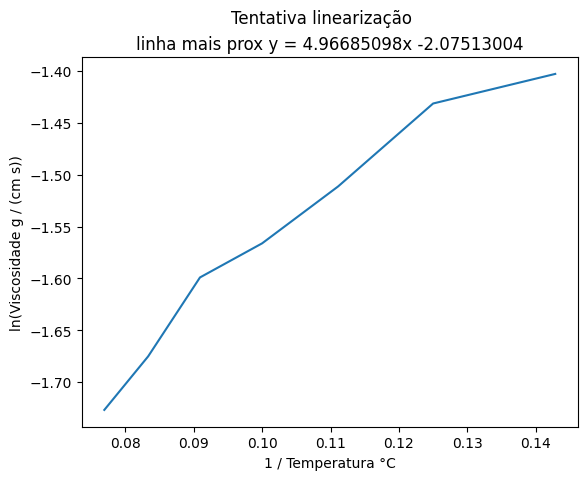

In [16]:
lnmu = [*range(len(t))]
Tinv = [*range(len(T))]
for i in range(len(T)):
    lnmu[i] = np.log(mu[i])
    Tinv[i] = 1 / T[i] 
    
lin = np.linalg.lstsq(np.vstack([Tinv, np.ones(len(Tinv))]).T, lnmu, rcond=None)[0]
print(lin) # slope, intercept

plot.plot(Tinv, lnmu)
plot.suptitle("Tentativa linearização")
plot.title("linha mais prox y = 4.96685098x -2.07513004")
plot.xlabel("1 / Temperatura °C")
plot.ylabel("ln(Viscosidade g / (cm s))")
plot.show

<function matplotlib.pyplot.show(close=None, block=None)>

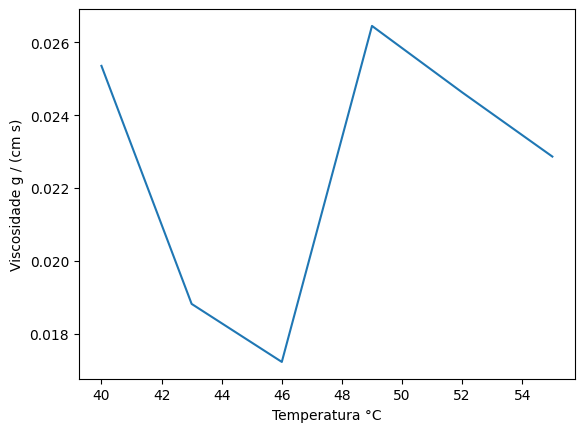

In [12]:
# visc capilar
k = 0.00015 # cm²/s²
beta = 0.00065 # K^-1
T = [40, 43, 46, 49, 52, 55] # celcius
t = [126.65, 94.2, 86.4, 132.91, 123.99, 115.35] # s
mu = [*range(len(t))] 
rhofluid = [*range(len(T))]

for i in range(len(T)):
    rhofluid[i] = rhoflu * (1 - (beta * ( T[i] - T0 )))
    mu[i] = k * rhofluid[i] * t[i]

plot.plot(T, mu)
plot.xlabel("Temperatura °C")
plot.ylabel("Viscosidade g / (cm s)")
plot.show
